In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Gaussian Naive Bayes classifier
https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [2]:
y1 = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2 = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y3 = np.array([np.random.rand(1) + 1.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1 = np.array(range(len(y1)))
x2 = np.array([c+50 for c in range(len(y2))])
x3 = np.array([c+80 for c in range(len(y3))])

In [3]:
# data matrix 
a1 = np.concatenate((x1.reshape(-1,1),y1,np.array([0 for c in range(len(x1))]).reshape(-1,1)), 1).round(4)
a2 = np.concatenate((x2.reshape(-1,1),y2,np.array([1 for c in range(len(x2))]).reshape(-1,1)), 1).round(4)
a3 = np.concatenate((x3.reshape(-1,1),y3,np.array([2 for c in range(len(x3))]).reshape(-1,1)), 1).round(4)

A = np.concatenate((a1,a2,a3), 0)

In [4]:
A.shape, y1.shape[0], y2.shape[0], y3.shape[0],

((241, 3), 71, 84, 86)

In [5]:
A

array([[  0.    ,   2.0265,   0.    ],
       [  1.    ,   2.277 ,   0.    ],
       [  2.    ,   2.7672,   0.    ],
       [  3.    ,   2.7091,   0.    ],
       [  4.    ,   2.0278,   0.    ],
       [  5.    ,   2.2337,   0.    ],
       [  6.    ,   2.2606,   0.    ],
       [  7.    ,   2.7312,   0.    ],
       [  8.    ,   2.2416,   0.    ],
       [  9.    ,   2.747 ,   0.    ],
       [ 10.    ,   2.6516,   0.    ],
       [ 11.    ,   2.5018,   0.    ],
       [ 12.    ,   2.9006,   0.    ],
       [ 13.    ,   2.7983,   0.    ],
       [ 14.    ,   2.9943,   0.    ],
       [ 15.    ,   2.0151,   0.    ],
       [ 16.    ,   2.9371,   0.    ],
       [ 17.    ,   2.5846,   0.    ],
       [ 18.    ,   2.0744,   0.    ],
       [ 19.    ,   2.0009,   0.    ],
       [ 20.    ,   2.6702,   0.    ],
       [ 21.    ,   2.6599,   0.    ],
       [ 22.    ,   2.9147,   0.    ],
       [ 23.    ,   2.8196,   0.    ],
       [ 24.    ,   2.8314,   0.    ],
       [ 25.    ,   2.906

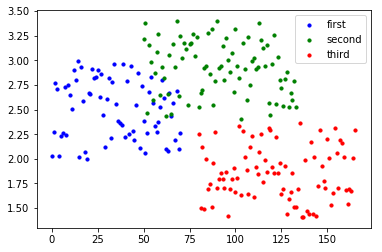

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', marker="o", label='first')
ax1.scatter(x2, y2, s=10, c='g', marker="o", label='second')
ax1.scatter(x3, y3, s=10, c='r', marker="o", label='third')
plt.legend(loc='upper right');
plt.show()

In [7]:
class NaiveBayesClass:
    def __init__(self, A):
        self.data = A
        self.classes = self.data.label.unique()
        self.class_data = self.__separate_data_by_classes__()
        self.class_probs = self.__get_probs_of_each_class__()
        self.class_means = self.__get_mean_of_each_class__()
        self.class_vars = self.__get_variances_class__()
        
    def __len__(self):
        return self.data.shape[0]
    
    def __separate_data_by_classes__(self):
        c_d = {}
        for c in self.classes:
            c_d[c] = (self.data.loc[self.data['label'] == c]).values[:,:-1]
        return c_d
    
    def __get_probs_of_each_class__(self):
        probs = []
        for c in self.classes:
            probs.append(len(self.class_data[c])/self.data.shape[0])
        return np.array(probs)
    
    def __get_mean_of_each_class__(self):
        means = {}
        for c in self.classes:
            m = []
            for i in range(self.data.shape[1] - 1):
                m.append(self.class_data[c][:,i].mean())
            means[c] = m
        return means
    
    def __get_variances_class__(self):
        variances = {}
        for c in self.classes:
            va = []
            for i in range(self.data.shape[1] - 1):
                va.append(self.class_data[c][:,i].var())
            variances[c] = va
        return variances
    
    def __get_gaussian_prob__(self, x, mean_, var_):
        somnojitels = []
        for i in range(x.shape[1]):
            x_feat = x[:,i]
            somnojitels.append((1/np.sqrt(2*np.pi*var_[i])*np.exp(-1/(2*var_[i])*(x_feat-mean_[i])**2)))
        return np.array(somnojitels).prod()
    
    def predict(self, x):
        res = []
        for row in x:
            pr = []
            for c in self.classes:
                pr.append(self.class_probs[c]*self.__get_gaussian_prob__(row.reshape(1,-1), self.class_means[c], self.class_vars[c]))
            res.append(np.argmax(pr))
        return res

In [8]:
df = pd.DataFrame(A)
df.columns = ['x', 'y', 'label']
df = df.astype({'x': 'float32', 'y': 'float32', 'label': 'int32'})

In [9]:
df.head()

,x,y,label
0,0.0,2.0265,0
1,1.0,2.2770,0
2,2.0,2.7672,0
3,3.0,2.7091,0
4,4.0,2.0278,0


In [10]:
nb = NaiveBayesClass(df)

In [11]:
df.label.unique().astype(int)

array([0, 1, 2])

In [12]:
nb.class_probs

array([0.29460581, 0.34854772, 0.35684647])

In [13]:
nb.class_vars

{0: [420.0, 0.08703672342605764],
 1: [587.9166666666666, 0.0736548964286419],
 2: [616.25, 0.07314999059635043]}

In [14]:
nb.class_means

{0: [35.0, 2.5082971881812726],
 1: [91.5, 2.920686897777376],
 2: [122.5, 1.85254186253215]}

In [15]:
predicted_class_label = nb.predict(A[:,:-1])

In [16]:
print('predicted_class_label', predicted_class_label)

predicted_class_label [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(predicted_class_label, A[:,-1])

0.966804979253112

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
clf = GaussianNB()
clf.fit(A[:,:-1], A[:,-1])

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
sklearn_predicted = clf.predict(A[:,:-1])
print(sklearn_predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2.]


In [21]:
accuracy_score(sklearn_predicted, A[:,-1])

0.966804979253112

In [22]:
# test dataset

y1_test = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2_test = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y3_test = np.array([np.random.rand(1) + 1.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1_test = np.array(range(len(y1_test)))
x2_test = np.array([c+50 for c in range(len(y2_test))])
x3_test = np.array([c+80 for c in range(len(y3_test))])

a1_test = np.concatenate((x1_test.reshape(-1,1),y1_test,np.array([0 for c in range(len(x1_test))]).reshape(-1,1)), 1).round(1)
a2_test = np.concatenate((x2_test.reshape(-1,1),y2_test,np.array([1 for c in range(len(x2_test))]).reshape(-1,1)), 1).round(1)
a3_test = np.concatenate((x3_test.reshape(-1,1),y3_test,np.array([2 for c in range(len(x3_test))]).reshape(-1,1)), 1).round(1)

A_test = np.concatenate((a1_test,a2_test,a3_test), 0)
np.random.shuffle(A_test)

In [23]:
A_test

array([[115. ,   1.6,   2. ],
       [134. ,   1.6,   2. ],
       [ 64. ,   3.3,   1. ],
       [ 27. ,   2.5,   0. ],
       [ 58. ,   2.1,   0. ],
       [ 17. ,   2.4,   0. ],
       [140. ,   3. ,   1. ],
       [ 68. ,   3.4,   1. ],
       [ 42. ,   2.9,   0. ],
       [ 91. ,   2.6,   1. ],
       [  5. ,   2.3,   0. ],
       [ 81. ,   1.8,   2. ],
       [ 77. ,   2.4,   0. ],
       [ 43. ,   2.7,   0. ],
       [ 97. ,   1.5,   2. ],
       [ 54. ,   2.3,   0. ],
       [108. ,   1.9,   2. ],
       [121. ,   3.2,   1. ],
       [ 50. ,   2.7,   0. ],
       [ 92. ,   2.3,   2. ],
       [100. ,   3.1,   1. ],
       [ 34. ,   2.7,   0. ],
       [145. ,   2.4,   2. ],
       [133. ,   3.2,   1. ],
       [139. ,   1.7,   2. ],
       [112. ,   1.7,   2. ],
       [ 83. ,   2.4,   0. ],
       [ 63. ,   3.1,   1. ],
       [ 87. ,   1.9,   2. ],
       [ 29. ,   2.3,   0. ],
       [116. ,   1.7,   2. ],
       [ 24. ,   2.3,   0. ],
       [ 61. ,   2.4,   0. ],
       [12

In [24]:
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

In [25]:
y_pred_test = nb.predict(X_test)

In [26]:
y_pred_test

[2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,


In [27]:
accuracy_score(y_pred_test, y_test)

0.8616600790513834

In [28]:
sklearn_predicted_test = clf.predict(X_test)
print(sklearn_predicted_test)

[2. 2. 1. 0. 0. 0. 1. 1. 0. 1. 0. 2. 1. 0. 2. 0. 2. 1. 0. 2. 1. 0. 2. 1.
 2. 2. 1. 1. 2. 0. 2. 0. 0. 2. 0. 1. 1. 1. 1. 2. 2. 1. 2. 1. 0. 2. 1. 0.
 2. 0. 1. 1. 0. 0. 0. 0. 2. 0. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1.
 0. 1. 0. 1. 0. 1. 2. 2. 2. 2. 1. 1. 1. 0. 1. 0. 2. 2. 1. 1. 0. 0. 2. 1.
 0. 1. 0. 1. 0. 2. 1. 1. 0. 1. 2. 0. 1. 1. 2. 0. 2. 1. 0. 1. 1. 2. 1. 0.
 0. 1. 2. 2. 0. 2. 2. 2. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 2. 1. 1. 1. 2. 1.
 1. 0. 1. 2. 1. 0. 2. 0. 0. 1. 2. 0. 2. 1. 2. 0. 0. 1. 2. 0. 0. 1. 2. 1.
 0. 2. 1. 0. 2. 1. 1. 2. 1. 1. 1. 2. 2. 0. 2. 2. 1. 0. 1. 2. 2. 0. 1. 1.
 0. 0. 0. 1. 2. 2. 2. 1. 2. 0. 1. 1. 2. 2. 0. 0. 0. 2. 2. 1. 1. 1. 0. 1.
 2. 0. 2. 0. 1. 1. 0. 0. 1. 1. 1. 2. 1. 0. 1. 2. 1. 1. 0. 2. 1. 1. 0. 0.
 1. 1. 1. 2. 1. 0. 1. 1. 2. 2. 0. 1. 1.]


In [29]:
accuracy_score(sklearn_predicted_test, y_test)

0.8616600790513834

https://en.wikipedia.org/wiki/Confusion_matrix

In [114]:
from sklearn.metrics import confusion_matrix  

cm = confusion_matrix(y_test, y_pred_test)

In [115]:
cm

array([[64, 19,  2],
       [ 9, 86,  4],
       [ 0,  1, 68]], dtype=int64)

In [116]:
def conf_mat(y_pred, y_test):
    classes = set(map(int, list(y_pred) + list(y_test)))
    conf_m = np.zeros((len(classes), len(classes)))
    for class_ in classes:
        for class2_ in classes:
            conf_m[class_, class2_] = ((np.array(y_pred_test) == class_) * (np.array(y_test) == class2_)).sum()
    return conf_m.astype(int)

In [117]:
conf_mat(y_pred_test, y_test)

array([[64,  9,  0],
       [19, 86,  1],
       [ 2,  4, 68]])

In [118]:
precision = np.diag(cm) / np.sum(cm, axis = 1)
recall = np.diag(cm) / np.sum(cm, axis = 0)

In [119]:
precision

array([0.75294118, 0.86868687, 0.98550725])

In [120]:
recall

array([0.87671233, 0.81132075, 0.91891892])

In [121]:
f1 = 2*np.mean(precision) * np.mean(recall)/(np.mean(precision) + np.mean(recall))
f1

0.869014547915698

In [122]:
binary_cm = cm[:2, :2]

In [123]:
binary_cm

array([[64, 19],
       [ 9, 86]], dtype=int64)

In [126]:
TPR = binary_cm[0,0]/binary_cm.sum(axis=1)[0]
FPR = binary_cm[1,0]/(binary_cm[1,0] + binary_cm[1,1])

In [127]:
TPR, FPR

(0.7710843373493976, 0.09473684210526316)